**Import required library**

In [1]:
#!pip install tensorflow-gpu

In [2]:
!nvidia-smi  # to check which GPU is allocated

Sun Dec 11 16:21:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
from tensorflow.keras.models import Sequential
from keras.utils import img_to_array,load_img

**unzip the zip file which containd data set**

In [5]:
from  zipfile import ZipFile
file_name  = "Alzheimer.zip"

with ZipFile(file_name,'r')as zip:
  zip.extractall()

In [6]:
# file path where train and test dataset is present
train_path = '/content/train'
test_path= '/content/test'

**Model built using ResNet50 State-of-Art Algorithm**

In [7]:
resnet = ResNet50(input_shape = (224,224,3),weights='imagenet',include_top =False)

In [8]:
# make use of existing weights to train
for layer in resnet.layers:
    layer.trainable = False

In [9]:
x = Flatten()(resnet.output)
output = Dense(4,activation ="softmax")(x)

In [10]:
#model building
model = Model(inputs = resnet.inputs,outputs=output)

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])

In [12]:
# Detailed summary of the model includes input layer, hidden layer and output layer etc
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# import images from dataset
train_data = ImageDataGenerator(rescale=1.0/225,
                                shear_range = 0.2,
                                zoom_range =0.2)

test_data = ImageDataGenerator(rescale = 1.0/225)

**Train & Test data set**

In [15]:
train_set = train_data.flow_from_directory(directory = train_path,
                                          target_size = (224,224),
                                          batch_size = 30,
                                          class_mode = 'categorical')

Found 5121 images belonging to 4 classes.


In [16]:
test_set = test_data.flow_from_directory(directory = test_path,
                                          target_size = (224,224),
                                          batch_size = 30,
                                          class_mode = 'categorical')

Found 1279 images belonging to 4 classes.


Early Stopping setup

In [17]:
import keras
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [18]:
#fit the model
fit = model.fit(train_set,
                         validation_data=test_set,
                         epochs=50,
                         callbacks = callback
                         )

Epoch 1/50
171/171 [==============================] - 65s 350ms/step - loss: 1.9914 - accuracy: 0.4769 - val_loss: 1.2580 - val_accuracy: 0.4488
Epoch 2/50
171/171 [==============================] - 58s 339ms/step - loss: 1.2991 - accuracy: 0.5255 - val_loss: 1.3500 - val_accuracy: 0.5152
Epoch 3/50
171/171 [==============================] - 59s 343ms/step - loss: 1.3423 - accuracy: 0.5300 - val_loss: 1.0449 - val_accuracy: 0.5035
Epoch 4/50
171/171 [==============================] - 59s 344ms/step - loss: 1.0309 - accuracy: 0.5782 - val_loss: 1.3916 - val_accuracy: 0.5043
Epoch 5/50
171/171 [==============================] - 59s 343ms/step - loss: 1.1819 - accuracy: 0.5602 - val_loss: 1.4573 - val_accuracy: 0.5035
Epoch 6/50
171/171 [==============================] - 59s 343ms/step - loss: 1.2432 - accuracy: 0.5610 - val_loss: 0.9283 - val_accuracy: 0.5880
Epoch 7/50
171/171 [==============================] - 59s 342ms/step - loss: 1.0208 - accuracy: 0.5907 - val_loss: 1.0306 - val_ac

In [19]:
test_loss, test_accuracy = model.evaluate(test_set)
print("Accuracy on the test data :",test_accuracy)

43/43 [==============================] - 5s 108ms/step - loss: 0.9283 - accuracy: 0.5880
Accuracy on the test data : 0.587959349155426


**Visualization on train and test accuracy**

In [20]:
h =  fit.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

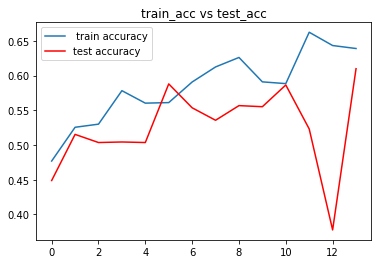

In [21]:
plt.plot(h['accuracy'],label =" train accuracy")
plt.plot(h['val_accuracy'] , c = "red", label ="test accuracy")
plt.title("train_acc vs test_acc")
plt.legend()
plt.show()

**Model build using VGG16**

In [22]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)

58889256/58889256 [==============================] - 0s 0us/step


In [23]:
# Compile the model
modelvgg.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])

In [24]:
# model check point
mc = keras.callbacks.ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

cb = [callback,mc]

In [25]:
# train the model
fit_vgg = modelvgg.fit(train_set, epochs=50, validation_data=test_set,callbacks= cb)

Epoch 1/50
171/171 [==============================] - ETA: 0s - loss: 0.9364 - accuracy: 0.5909
Epoch 1: val_accuracy improved from -inf to 0.61767, saving model to best_model.h5
171/171 [==============================] - 72s 402ms/step - loss: 0.9364 - accuracy: 0.5909 - val_loss: 0.8392 - val_accuracy: 0.6177
Epoch 2/50
171/171 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.7006
Epoch 2: val_accuracy did not improve from 0.61767
171/171 [==============================] - 65s 377ms/step - loss: 0.6926 - accuracy: 0.7006 - val_loss: 1.1218 - val_accuracy: 0.5895
Epoch 3/50
171/171 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.7620
Epoch 3: val_accuracy improved from 0.61767 to 0.67005, saving model to best_model.h5
171/171 [==============================] - 65s 378ms/step - loss: 0.5638 - accuracy: 0.7620 - val_loss: 0.8258 - val_accuracy: 0.6701
Epoch 4/50
171/171 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0

In [26]:
test_loss, test_accuracy = modelvgg.evaluate(test_set)
print("Accuracy on the test data :",test_accuracy)

43/43 [==============================] - 7s 163ms/step - loss: 0.7993 - accuracy: 0.7021
Accuracy on the test data : 0.702111005783081


**Prediction on image**

In [27]:
#create dictionary to map alzheimer classes
out = { 0: "MildDemented",
        1: "ModerateDemented",
        2: "NonDemented",
        3: "VeryMildDemented"}

In [28]:
path = "/content/img.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

(1, 224, 224, 3)

In [29]:
pred = np.argmax(model.predict(input_arr))
print("Alzheimer is : ", out.get(pred))

1/1 [==============================] - 1s 1s/step
Alzheimer is :  NonDemented


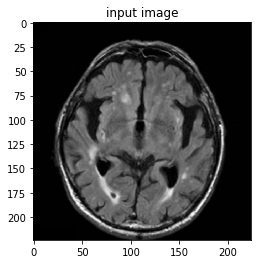

In [30]:
# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()